### Anna Feldman Assignment 7

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

/var/folders/sf/whvty1j57cxcxs3t3mhwbcgh0000gn/T/ipykernel_80563/2149121849.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
url="data/citibike_sample_boros.csv"
df = pd.read_csv(url)
df.head()

,starttime,hour,day,usertype,gender,age,tripduration_minutes,distance_miles,start_boro,end_boro
0,2020-10-27 16:51:37.994,16,Tuesday,Subscriber,male,37,21.816667,3.047236,Manhattan,Manhattan
1,2020-10-09 19:46:12.616,19,Friday,Subscriber,male,24,25.883333,1.418907,Manhattan,Manhattan
2,2020-10-10 15:19:17.455,15,Saturday,Subscriber,female,36,7.283333,0.502512,Brooklyn,Brooklyn
3,2020-10-28 01:30:42.644,1,Wednesday,Subscriber,male,31,24.833333,0.633161,Brooklyn,Brooklyn
4,2020-10-11 16:48:46.773,16,Sunday,Subscriber,male,42,19.633333,1.002208,Brooklyn,Brooklyn


#### 2a - Fit a simple linear regression model called model1 of the form y ∼ X, where y is trip duration in minutes and X is distance in miles.

In [4]:
formula = "tripduration_minutes ~ distance_miles"

In [5]:
model = smf.ols(formula,data=df).fit()

#### 2b - View a summary of model1.

In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     tripduration_minutes   R-squared:                       0.209
Model:                              OLS   Adj. R-squared:                  0.209
Method:                   Least Squares   F-statistic:                 1.320e+05
Date:                  Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                          14:15:05   Log-Likelihood:            -1.9913e+06
No. Observations:                500000   AIC:                         3.983e+06
Df Residuals:                    499998   BIC:                         3.983e+06
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.0094      0.029    307.067      0.000       8.952       9.067
distance_miles     6.0801      0.017    363.311      0.000       6.047       6.113
==============================================================================
Omnibus:                   463117.618   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21435570.106
Skew:                           4.473   Prob(JB):                         0.00
Kurtosis:                      33.804   Cond. No.                         3.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2c - What is R2 for model1?

R-squared is 0.209. This model shows that roughly 21% of the variation in the dependent variable (trip duration in minutes) can be explained in this model by the independent variable (distance in miles).

#### 2d - What is the Sum of Squared Residuals for model1? (Hint: you can access this with: model.ssr).

In [7]:
model.ssr
#high number means model is poorer fit for this data

84267381.65706764

#### 2e - Interpret the model’s coefficients. What is the intercept, and what is the slope of the regression line? What do this intercept and slope suggest about the relationship between y and X, under this model?

The y-intercept is 9.0094 and the slope is 6.0801. These suggest that 9 minutes is the minimum trip duration at 0 distance in miles (round trips), and that for every additional mile of distance traveled, the increase in trip duration is about 6 minutes.

#### 2f - Plot your regression line on top of a scatter plot of the actual data, with trip duration on the y-axis and distance on the x-axis. Do you see any concerning patterns?

Looking at the data in regression plot below, the standard deviation of the data is very skewed around the zero distance in miles mark, as compared to later distances where the data clusters more closely around the regression line. This suggests that this model may not be the best way to plot the data.

In [8]:
import matplotlib.pyplot as plt

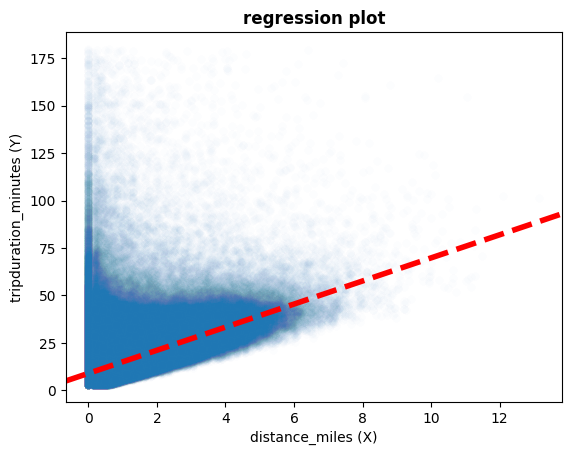

In [9]:
ax = sns.scatterplot(y=model.model.endog,
                     x=model.model.exog[:,1], alpha=0.01)
sm.graphics.abline_plot(model_results=model, color='red',
                        linewidth=4, linestyle='--', ax=ax)
plt.title("regression plot", fontweight='bold')
plt.xlabel(f"{model.model.exog_names[1]} (X)")
plt.ylabel(f"{model.model.endog_names} (Y)");

#### 2g - Plot your model’s residuals as a histogram. Do the residuals look approximately normally distributed around zero?

No, rather than being centered around zero, there is a longer righthand tail, meaning the residuals look right-skewed.

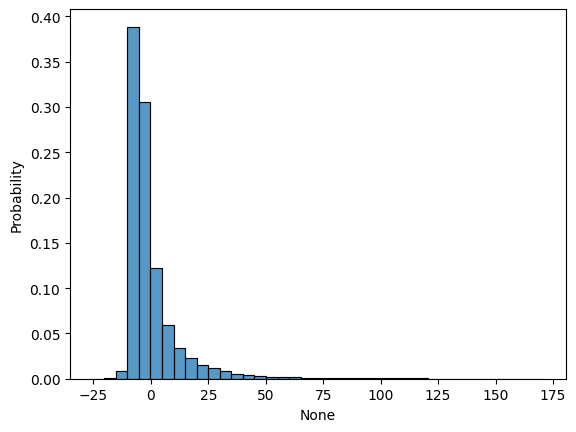

In [10]:
sns.histplot(x=model.resid, stat='probability', binwidth=5);

#### 2h - Plot your model’s residuals as a scatter plot, with the residuals on the y-axis and actual trip distance on the x-axis. Do the residuals look homoscedastic or heteroscedastic?

The residuals in this plot look heteroscedastic and not uniformly distributed around zero. Trips in the shorter distance range have larger errors (residual spread of data around the line is larger).

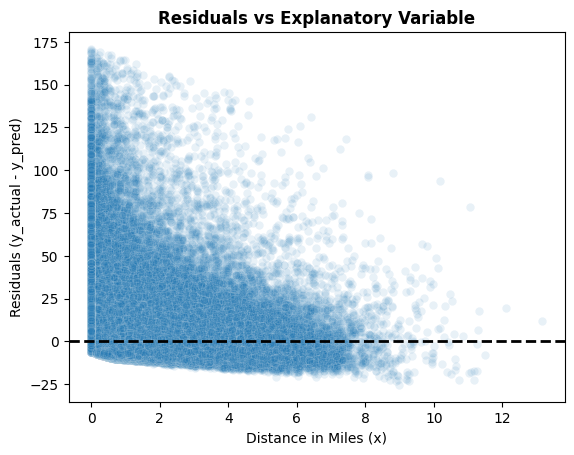

In [11]:
ax = sns.scatterplot(x=model.model.exog[:,1],
                     y=model.resid, alpha=0.1)
ax.axhline(0, color='black',lw=2, linestyle='--');
ax.set_title('Residuals vs Explanatory Variable', fontweight="bold")
ax.set_xlabel('Distance in Miles (x)')
ax.set_ylabel('Residuals (y_actual - y_pred)');

#### 2i - Considering your results from 2g) and 2h), does this baseline model satisfy or violate the assumptions that linear regression makes about the residuals?
This violates assumptions that the linear regression makes that the residuals are homoscedastic, that the variance of the residuals is constant across all levels of the independent variables. Predictions in this shorter distance range (where there appear to be higher errors/residuals) probably need to be modeled differently to more accurately fit the data.

#### 3a - Install the piecewise-regression library with pip install piecewise-regression.

In [10]:
import piecewise_regression as pwr

#### 3b - Fit a Piecewise Regression model of the form y ∼ X, again with y = duration and X = distance, and with n_breakpoints = 2. Piecewise Regression can take a long time on large datasets, so only use a sample 10,000 trips to fit the model.

In [11]:
sample = df.sample(10000)

In [12]:
x = sample['distance_miles'].values
y = sample['tripduration_minutes'].values

In [13]:
pw_reg = pwr.Fit(x, y, n_breakpoints=2)

#### 3c - Plot the resulting regression line from the Piecewise Regression.

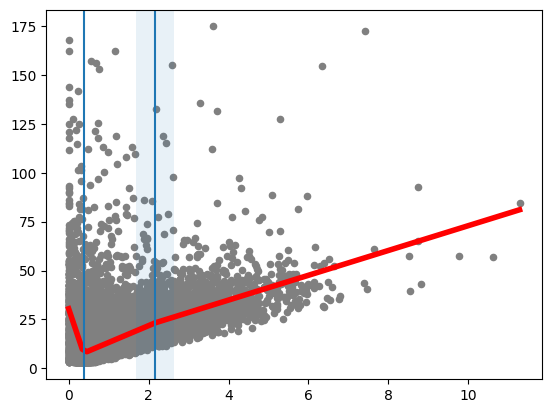

In [14]:
pw_reg.plot_data(color='grey', s=20)
pw_reg.plot_fit(color='red', linewidth=4)
pw_reg.plot_breakpoints()
pw_reg.plot_breakpoint_confidence_intervals()

#### 3d - What are the breakpoints detected by the Piecewise Regression?

Seen in the summary of results below, the two breakpoints are located at x=0.394 and x=2.748 (distance in miles).

In [15]:
pw_reg.summary()


                    Breakpoint Regression Results                     
No. Observations                    10000
No. Model Parameters                    6
Degrees of Freedom                   9994
Res. Sum of Squares           1.49314e+06
Total Sum of Squares          2.14025e+06
R Squared                        0.302350
Adjusted R Squared               0.301931
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                30.4734        0.627       48.599           0.0       29.244       31.703
alpha1              -60.6011         2.65      -22.909     3.03e-113      -65.786      -55.416
beta1                 69.232         2.66       25.995             -       64.011       74.452
beta2               -2.28895        0.419      -5.4655             -      -3.1099       -1.468
breakpoint1      

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                    10000\nNo. Model Parameters                    6\nDegrees of Freedom                   9994\nRes. Sum of Squares           1.49314e+06\nTotal Sum of Squares          2.14025e+06\nR Squared                        0.302350\nAdjusted R Squared               0.301931\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst                30.4734        0.627       48.599           0.0       29.

#### 3e - These two breakpoints create three regression segments. How do the three regression segments compare to each other? Are there any major changes in slope?

There is a pretty drastic change in slope from the first segment to the second, with the alpha1 slope of the first segment measuring at a sharp downward -60.2769 and covering the lowest distance ranges (roughly under 1/2 mile in the dataset). The second segment's slope (8.53172) is positive and increasing with each additional mile up until roughly 3 miles of distance. The third and longest (for the range of distances covered after 3 miles) segment is also positive (5.83086), but more moderately positive, or increasing less per each mile, relative to the second segment.

#### 4a - Using the breakpoints that you calculated in Problem 3, create a new column in df called distance_category. This new column should contain ‘round trip’ for trips with distance less than Breakpoint 1, ‘medium’ for trips with distance between Breakpoint 1 and Breakpoint 2, and ‘long’ for trips with distance greater than Breakpoint 2.

In [28]:
estimates = pw_reg.get_results()['estimates']

In [29]:
breakpoints = [estimates[i]['estimate'] for i in estimates if 'breakpoint' in i]

In [30]:
print(breakpoints)

[0.39391892576955434, 2.747721313425718]


In [31]:
def create_distance_categories(x, breakpoints):
    if x < breakpoints[0]:
        return "round_trip"
    elif x >= breakpoints[0] and x <breakpoints[1]:
        return "medium"
    elif x >= breakpoints[1]:
        return "long"

In [33]:
df['distance_category'] = df['distance_miles'].apply(lambda x: create_distance_categories(x, breakpoints))

In [35]:
df[['distance_miles', 'distance_category']]

,distance_miles,distance_category
0,3.047236,long
1,1.418907,medium
2,0.502512,medium
3,0.633161,medium
4,1.002208,medium
...,...,...
499995,0.000000,round_trip
499996,0.480442,medium
499997,1.463696,medium
499998,2.151782,medium


#### 4b - Fit a multiple linear regression (MLR) model called model2 of the form y ∼ X1 + X2, where y is trip duration in minutes, X1 is A-to-B distance in miles, and X2 is the categorical variable distance_category that you just created.

In [42]:
formula2 = "tripduration_minutes ~ distance_miles + C(distance_category)"

In [43]:
model2 = smf.ols(formula2,data=df).fit()

#### 4c - View a summary of model2. What is the R2?
The R-squared is 0.263, meaning about 26% of the variation in the dependent variable can be attributed to the independent variables. The rest is unexplained by this model.

In [44]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     tripduration_minutes   R-squared:                       0.263
Model:                              OLS   Adj. R-squared:                  0.263
Method:                   Least Squares   F-statistic:                 5.957e+04
Date:                  Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                          09:26:58   Log-Likelihood:            -1.9734e+06
No. Observations:                500000   AIC:                         3.947e+06
Df Residuals:                    499996   BIC:                         3.947e+06
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              5.6363      0.120     47.070      0.000       5.402       5.871
C(distance_category)[T.medium]         0.1694      0.093      1.828      0.068      -0.012       0.351
C(distance_category)[T.round_trip]    11.6198      0.126     92.505      0.000      11.374      11.866
distance_miles                         7.4382      0.028    262.740      0.000       7.383       7.494
==============================================================================
Omnibus:                   453132.701   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21744518.009
Skew:                           4.296   Prob(JB):                         0.00
Kurtosis:                      34.143   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 4d - Interpret model2’s coefficients. What is the change in duration associated with a trip being a ‘round trip’, versus a ‘long trip’?
The round trip coefficient is 11.7, so for each additional mile, the change in trip duration is much higher at almost 12 minutes on top of the initial/baseline 7.5 minutes associated with every additional mile. The long trip category is assumed to be that baseline with a coefficient of 0.

#### 4e - Fit another multiple linear regression (MLR) model called model3 of the form y ∼ X1 ∗ X2, where y is trip duration in minutes, X1 is A-to-B distance in miles, X2 is distance_category. In this formulation, we are including an interaction term between X1 and X2 by using the ∗ operator.

In [45]:
formula3 = "tripduration_minutes ~ distance_miles * C(distance_category)"

In [46]:
model3 = smf.ols(formula3,data=df).fit()

#### 4f - View and interpret the results of model3. Does adding an interaction term between X1 and X2 as you did in 4e) improve the model, compared to model2 which had no interaction term? Why?
Yes, this improved the model. The R-squared in this model is higher at 0.323, meaning about 32% of the variation in the dependent variable can be attributed to the independent variables versus model2's 26%. 

In [47]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     tripduration_minutes   R-squared:                       0.323
Model:                              OLS   Adj. R-squared:                  0.323
Method:                   Least Squares   F-statistic:                 4.780e+04
Date:                  Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                          09:30:36   Log-Likelihood:            -1.9522e+06
No. Observations:                500000   AIC:                         3.904e+06
Df Residuals:                    499994   BIC:                         3.904e+06
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             9.6534      0.203     47.605      0.000       9.256      10.051
C(distance_category)[T.medium]                       -5.0975      0.207    -24.586      0.000      -5.504      -4.691
C(distance_category)[T.round_trip]                   21.6905      0.219     98.838      0.000      21.260      22.121
distance_miles                                        6.3751      0.052    122.836      0.000       6.273       6.477
distance_miles:C(distance_category)[T.medium]         2.0970      0.061     34.403      0.000       1.978       2.217
distance_miles:C(distance_category)[T.round_trip]   -68.5364      0.340   -201.668      0.000     -69.202     -67.870
==============================================================================
Omnibus:                   470990.390   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26400725.151
Skew:                           4.516   Prob(JB):                         0.00
Kurtosis:                      37.433   Cond. No.                         52.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 5a - Choose or create at least two additional features from df and incorporate them into a new model called model4. Fit model4 and view the results.

In [63]:
formula4 = "tripduration_minutes ~ distance_miles * distance_category * gender"
model4 = smf.ols(formula4,data=df).fit()
model4.summary()
#33.6% goodness of fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     tripduration_minutes   R-squared:                       0.336
Model:                              OLS   Adj. R-squared:                  0.336
Method:                   Least Squares   F-statistic:                 1.487e+04
Date:                  Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                          09:58:29   Log-Likelihood:            -1.9475e+06
No. Observations:                500000   AIC:                         3.895e+06
Df Residuals:                    499982   BIC:                         3.895e+06
Df Model:                            17                                         
Covariance Type:              nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            9.7939      0.375     26.148      0.000       9.060      10.528
distance_category[T.medium]                                         -4.9182      0.383    -12.845      0.000      -5.669      -4.168
distance_category[T.round_trip]                                     22.5317      0.407     55.297      0.000      21.733      23.330
gender[T.male]                                                       0.0829      0.460      0.180      0.857      -0.819       0.985
gender[T.unknown]                                                   -1.4434      0.645     -2.237      0.025      -2.708      -0.179
distance_category[T.medium]:gender[T.male]                          -0.9627      0.470     -2.047      0.041      -1.884      -0.041
distance_category[T.round_trip]:gender[T.male]                      -3.5482      0.500     -7.099      0.000      -4.528      -2.569
distance_category[T.medium]:gender[T.unknown]                        4.3330      0.663      6.533      0.000       3.033       5.633
distance_category[T.round_trip]:gender[T.unknown]                    6.7879      0.695      9.771      0.000       5.426       8.149
distance_miles                                                       6.6626      0.097     68.719      0.000       6.473       6.853
distance_miles:distance_category[T.medium]                           2.0668      0.113     18.317      0.000       1.846       2.288
distance_miles:distance_category[T.round_trip]                     -72.4081      0.646   -112.079      0.000     -73.674     -71.142
distance_miles:gender[T.male]                                       -0.7800      0.119     -6.582      0.000      -1.012      -0.548
distance_miles:gender[T.unknown]                                     1.1929      0.165      7.235      0.000       0.870       1.516
distance_miles:distance_category[T.medium]:gender[T.male]            0.2736      0.138      1.980      0.048       0.003       0.545
distance_miles:distance_category[T.round_trip]:gender[T.male]        8.6367      0.781     11.055      0.000       7.105      10.168
distance_miles:distance_category[T.medium]:gender[T.unknown]        -1.8274      0.198     -9.231      0.000      -2.215      -1.439
distance_miles:distance_category[T.round_trip]:gender[T.unknown]     9.3960      1.150      8.173      0.000       7.143      11.649
==============================================================================
Omnibus:                   469800.195   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26513370.418
Skew:                          

In [61]:
formula5 = "tripduration_minutes ~ distance_miles * distance_category * usertype * gender"
model5 = smf.ols(formula5,data=df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     tripduration_minutes   R-squared:                       0.358
Model:                              OLS   Adj. R-squared:                  0.358
Method:                   Least Squares   F-statistic:                     7957.
Date:                  Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                          09:47:07   Log-Likelihood:            -1.9391e+06
No. Observations:                500000   AIC:                         3.878e+06
Df Residuals:                    499964   BIC:                         3.879e+06
Df Model:                            35                                         
Covariance Type:              nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                   9.9498      0.747     13.314      0.000       8.485      11.414
distance_category[T.medium]                                                                 1.1574      0.772      1.499      0.134      -0.356       2.670
distance_category[T.round_trip]                                                            30.4833      0.798     38.216      0.000      28.920      32.047
usertype[T.Subscriber]                                                                      0.2522      0.859      0.294      0.769      -1.431       1.936
gender[T.male]                                                                             -0.6044      0.946     -0.639      0.523      -2.460       1.251
gender[T.unknown]                                                                          -2.1121      0.926     -2.280      0.023      -3.928      -0.296
distance_category[T.medium]:usertype[T.Subscriber]                                         -7.4500      0.885     -8.421      0.000      -9.184      -5.716
distance_category[T.round_trip]:usertype[T.Subscriber]                                    -12.4301      0.923    -13.464      0.000     -14.240     -10.621
distance_category[T.medium]:gender[T.male]                                                 -1.9444      0.978     -1.989      0.047      -3.860      -0.028
distance_category[T.round_trip]:gender[T.male]                                             -2.9573      1.012     -2.921      0.003      -4.942      -0.973
distance_category[T.medium]:gender[T.unknown]                                              -0.5843      0.957     -0.611      0.541      -2.459       1.291
distance_category[T.round_trip]:gender[T.unknown]                                           0.3358      0.989      0.339      0.734      -1.603       2.275
usertype[T.Subscriber]:gender[T.male]                                                       0.6310      1.078      0.585      0.558      -1.482       2.744
usertype[T.Subscriber]:gender[T.unknown]                                                    4.0912      1.863      2.196      0.028       0.439       7.743
distance_category[T.medium]:usertype[T.Subscriber]:gender[T.male]                           1.4798      1.110      1.333      0.183      -0.696       3.656
distance_category[T.round_trip]:usertype[T.Subscriber]:gender[T.male]                       0.9209      1.159      0.794      0.427      -1.351       3.193
distance_category[T.medium]:usertype[T.Subscriber]:gender[T.unknown]                       -0.829

#### 5b - Is there any improvement in the goodness of fit or normality of the residuals compared to model3? If you are happy with the improvement, move on to 5c). Otherwise, reconsider your choices in 5a).

Adding in gender and usertype, I was able to improve the R-squared/goodness of fit of the model to around 36% from 32%, however the normality of the residuals did not seem to significantly improve based on skew, kurtosis, and omnibus numbers, even though the Jarque-Bera measure did decrease. Possibly this is an indication of noise or overfitting the model with additional variables?

#### 5c - Once you are happy with your model, explain your rationale for choosing the additional variables that you did, and explain how and why you chose to incorporate them (i.e. with or without interaction).

Since I already had seen that Subscribers overall take shorter trips than Customers in the last exercises, I knew that usertype would add in some explanatory power to the linear regression model if incorporated. I also remembered gender having a similar pattern in the data, with female riders taking slightly longer trips on average, so I reasoned that including both of these would improve the model and have a compounding effect with interaction. Adding them both in without interaction improved it a little, but with interaction, it improved more. I iterated through some combinations of these with and without interaction for either or both gender and usertype variables in order to confirm that adding in both with interaction would improve the goodness of fit. (This is an area I think I need some more experience and understanding to fully feel confident in my choices.)

#### 5d - There are many potential factors which could influence the duration of a bike-share trip. Suggest at least two additional factors not included in our dataset that you think would improve our model’s predictive power and explain why.
1. Including incentives or deals for using bikes that might increase the duration and mileage for certain types of users.
2. Including bike density/availability or lack thereof in certain boroughs, e.g. a user cannot often pick up or drop off at certain spots, so then may end up increasing their trip duration while on the bike or may walk further to find a bike, increasing their overall bike distance traveled once they locate one. 